In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Labels Parsing

In [2]:
train_file = 'yearbook_train.txt'

In [12]:
labels = {'M': {}, 'F': {}}
with open(train_file) as w:
    for line in w:
        l = int(line.strip().split()[-1])
        k = line.strip().split('/')[0]
        if l not in labels[k]:
            labels[k][l] = 1
        else:
            labels[k][l] += 1

In [13]:
m_year = list(labels['M'].keys())
m_count = [labels['M'][yr] for yr in m_year]

f_year = list(labels['F'].keys())
f_count = [labels['F'][yr] for yr in f_year]

### Labels Distributions

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

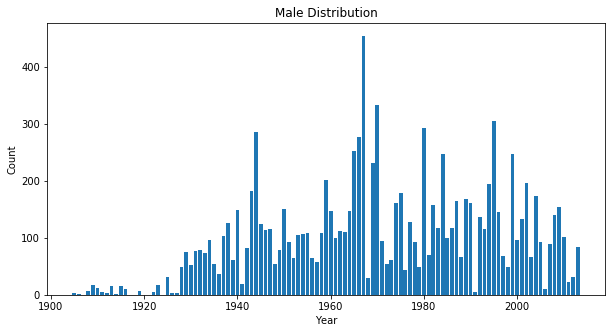

In [25]:
plt.title('Male Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.bar(m_year, m_count)
plt.show()

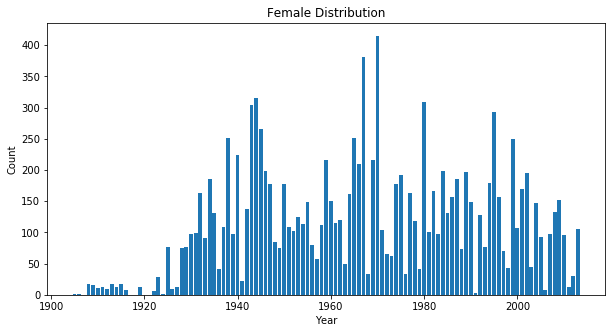

In [26]:
plt.title('Female Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.bar(f_year, f_count)
plt.show()

### Image Statistics

In [9]:
import torch
from torchvision import transforms, datasets
import numpy as np

In [28]:
data_transform = transforms.Compose([transforms.Grayscale(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.5089547997389491],
                                     std=[1])])
allImages = datasets.ImageFolder(root='./train',transform = data_transform)

In [29]:
dataloader = torch.utils.data.DataLoader(allImages,batch_size = 1)

In [30]:
for x in dataloader:
    print(x[0])
    break

tensor([[[[ 0.4910,  0.4871,  0.3695,  ..., -0.0972, -0.0893, -0.0854],
          [ 0.4910,  0.4910,  0.3695,  ..., -0.0972, -0.0893, -0.0893],
          [ 0.4910,  0.4910,  0.3969,  ..., -0.0933, -0.0893, -0.0854],
          ...,
          [ 0.3459,  0.3420,  0.3420,  ...,  0.2910,  0.2950,  0.2950],
          [ 0.3459,  0.3420,  0.3420,  ...,  0.2910,  0.2950,  0.2989],
          [ 0.3459,  0.3420,  0.3420,  ...,  0.2871,  0.2950,  0.2989]]]])


In [5]:
len(allImages)

22840

In [25]:
running = 0
for i,batch in enumerate(dataloader):
    x = np.squeeze(batch[0].numpy())
#     l = x.shape[1]
#     w = x.shape[2]
    bs = x.shape[0]
    
    running += np.mean(x)*bs
print(running/len(allImages))

0.5089547997389491


In [27]:
mu = 0.5089547997389491